Check multitasking model performance- predict caste, predict gender, predict marks in total(range in 10 point scale) (AIEEE data)
1. Caste and Marks from AIEEE data
2. Gender also from AIEEE data

In [ ]:
%%capture
!unzip AIEEEData.zip
!unzip PreProcessing.zip

In [ ]:
# AIEEE_2009_CSV = "../DataSets/AIEEEData/aieee_2009.csv"
# AIEEE_2010_CSV = "../DataSets/AIEEEData/aieee_2010.csv"
# AIEEE_2011_CSV = "../DataSets/AIEEEData/aieee_2011.csv"

In [ ]:
AIEEE_2009_CSV = "AIEEEData/aieee_2009.csv"
AIEEE_2010_CSV = "AIEEEData/aieee_2010.csv"
AIEEE_2011_CSV = "AIEEEData/aieee_2011.csv"

In [ ]:
%pwd

'/content'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sys  
sys.path.insert(0, './PreProcessing/')

from preprocess_aieee import *
from char_utils import *

In [ ]:
ai10 = pd.read_csv(AIEEE_2010_CSV)
ai11 = pd.read_csv(AIEEE_2011_CSV)
ai09 = pd.read_csv(AIEEE_2009_CSV)
ai10 = preprocess_aieee(ai10)
ai11 = preprocess_aieee(ai11)
ai09 = preprocess_aieee(ai09)

marks in 10 point scale

In [ ]:
marks_10 = getMarks(ai10,'p1_marks',MAX_2010)
marks_11 = getMarks(ai11, 'p1_marks',MAX_2011)
marks_09 = getMarks(ai09, 'p1_marks', MAX_2009)

In [ ]:
# # If you can plot the count based on buckets
# ranges = [-10,0,1,2,3,4,5,6,7,8,9,10]
# l1 = marks_09.groupby(pd.cut(marks_09.Marks, ranges)).count()
# l2 = marks_10.groupby(pd.cut(marks_10.Marks, ranges)).count()
# l3 = marks_11.groupby(pd.cut(marks_11.Marks, ranges)).count()

# X_axis = np.arange(len(ranges[1:]))

# plt.bar(X_axis - 0.2, list(l1.Name),0.2 , label = '2009')
# plt.bar(X_axis + 0, list(l2.Name),0.2 ,label = '2010')
# plt.bar(X_axis + 0.2, list(l3.Name),0.2 ,label = '2011')

# plt.xticks(X_axis, ranges[1:])
# plt.xlabel("Marks Range")
# plt.ylabel("Number of Students")
# plt.title("Marks distribution in AIEEE Sample collected")
# plt.legend()
# plt.show()

In [ ]:
print(marks_09.shape)
print(marks_10.shape)
print(marks_11.shape)

(106592, 2)
(116290, 2)
(115516, 2)


Convert Names to embedding

Get Gender labels

In [ ]:
gender_10 = getGenderNames(ai10)
gender_11 = getGenderNames(ai11)
gender_09 = getGenderNames(ai09)

In [ ]:
print(gender_09.groupby('Gender').count())
print(gender_10.groupby('Gender').count())
print(gender_11.groupby('Gender').count())

          Name
Gender        
FEMALE  112579
MALE    112579
          Name
Gender        
FEMALE  122871
MALE    122871
          Name
Gender        
FEMALE  123072
MALE    123072


Get caste labels

In [ ]:
caste_10 = getCaste(ai10, 'category')
caste_11 = getCaste(ai11, 'category')
caste_09 = getCaste(ai09, 'category')

./PreProcessing/preprocess_aieee.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [elem.replace("Sub-PH", "") for elem in df1[col]]


In [ ]:
# print(caste_09.groupby('Caste').count())
# print(caste_10.groupby('Caste').count())
# print(caste_11.groupby('Caste').count())

# ranges = ['GEN','OBC','SC','ST']
# l1 = caste_09.groupby('Caste').count()
# l2 = caste_10.groupby('Caste').count()
# l3 = caste_11.groupby('Caste').count()

# X_axis = np.arange(len(ranges))

# plt.bar(X_axis - 0.1, list(l1.Name),0.1 , label = '2009')
# plt.bar(X_axis + 0, list(l2.Name),0.1 ,label = '2010')
# plt.bar(X_axis + 0.1, list(l3.Name),0.1 ,label = '2011')

# plt.xticks(X_axis, ranges)
# plt.xlabel("Caste")
# plt.ylabel("Number of Students")
# plt.title("Caste distribution in AIEEE Sample collected")
# plt.legend()
# plt.show()

In [ ]:
# Marks range based on gender => Get corresponding datsets and may be a common function to plot
# Marks range based on caste => Get corresponding datasets and may be a common function to plot

In [ ]:
caste_df = pd.concat([caste_09, caste_10, caste_11], ignore_index=True)
gender_df = pd.concat([gender_09, gender_10, gender_11], ignore_index=True)
marks_df = pd.concat([marks_09, marks_10, marks_11], ignore_index=True)

In [ ]:
print(caste_df.shape)
print(gender_df.shape)
print(marks_df.shape)

print(caste_df.groupby('Caste').count())
print(gender_df.groupby('Gender').count())

(358511, 2)
(717044, 2)
(338398, 2)
         Name
Caste        
GEN    198865
OBC    115048
SC      32782
ST      11816
          Name
Gender        
FEMALE  358522
MALE    358522


In [ ]:
cm_10 = getMarksCaste(ai10, MAX_2010)
cm_11 = getMarksCaste(ai11, MAX_2011)
cm_09 = getMarksCaste(ai09, MAX_2009)

./PreProcessing/preprocess_aieee.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['category'].replace('', np.NaN)


In [ ]:
cm_df = pd.concat([cm_09, cm_10, cm_11], ignore_index=True)

In [ ]:
cm_df.shape

(338389, 3)

### DataSet Generator

In [ ]:
train_mx, train_my, test_mx, test_my, val_mx, val_my = splitMarks(marks_df)

In [ ]:
train_cx, train_cy, test_cx, test_cy, val_cx, val_cy = splitCaste(caste_df)

In [ ]:
train_gx, train_gy, test_gx, test_gy, val_gx, val_gy = splitGender(gender_df)

In [ ]:
train_cmx, train_cmy, train_cmy1, val_cmx, val_cmy, val_cmy1, test_cmx, test_cmy, test_cmy1 = splitCasteMarks(cm_df)

Train: ((234753, 30),(234753,)) Val:((33556, 30),(33556,)) Test: ((67114, 30),(67114,))


In [ ]:
print(f'Train: ({train_cmx.shape},{train_cmy.shape},{train_cmy1.shape}) Val:({val_cmx.shape},{val_cmy.shape},{val_cmy1.shape}) Test: ({test_cmx.shape},{test_cmy.shape},{test_cmy1.shape})')


Train: ((234753, 30),(234753,),(234753, 4)) Val:((33556, 30),(33556,),(33556, 4)) Test: ((67114, 30),(67114,),(67114, 4))


### Model

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.models import Sequential, Model, load_model
from tensorflow.python.keras.layers import Dense, Embedding
from tensorflow.python.keras.layers import LSTM, Conv1D
from tensorflow.python.keras.layers import Input, Dense, Flatten
from tensorflow.python.keras.callbacks import TensorBoard

In [ ]:
voc = vocab()

In [ ]:
input_ = Input(shape=(30,), name='input')

embed = Embedding(len(voc), len(voc), name='embed')(input_)
# lstm = LSTM(128, return_sequences=True, activation='tanh', name='lstm')(embed)

conv_1 = Conv1D(filters = 256, kernel_size = 7, activation = 'relu')(embed)
dropout = Dropout(0.2, name='dropout_1')(conv_1)

# flat_1 = Flatten()(conv_1)
# output_1 = Dense(2, activation='softmax', name='gender')(flat_1)

flat_2 = Flatten()(dropout)
caste = Dense(4, activation='softmax', name='caste')(flat_2)

flat_3 = Flatten()(dropout)
marks = Dense(1, name='marks')(flat_3)

model = Model(inputs= input_, outputs=[marks, caste])

model.compile(
    loss={
        # 'gender': 'sparse_categorical_crossentropy',
        'caste': 'categorical_crossentropy',
        'marks': 'mean_squared_error'
    },
    optimizer='adam',
    metrics={
        'caste':'categorical_accuracy',
        'marks':'mean_squared_error',
    }
)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 30)]         0                                            
__________________________________________________________________________________________________
embed (Embedding)               (None, 30, 28)       784         input[0][0]                      
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 24, 256)      50432       embed[0][0]                      
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 24, 256)      0           conv1d_2[0][0]                   
____________________________________________________________________________________________

In [ ]:
model.fit(
    {'input':train_cmx},
    {'marks':train_cmy, 'caste':train_cmy1},
    validation_data= ({'input':val_cmx},
    {'marks':val_cmy, 'caste':val_cmy1}),
    batch_size=1000,
    epochs=50,
)

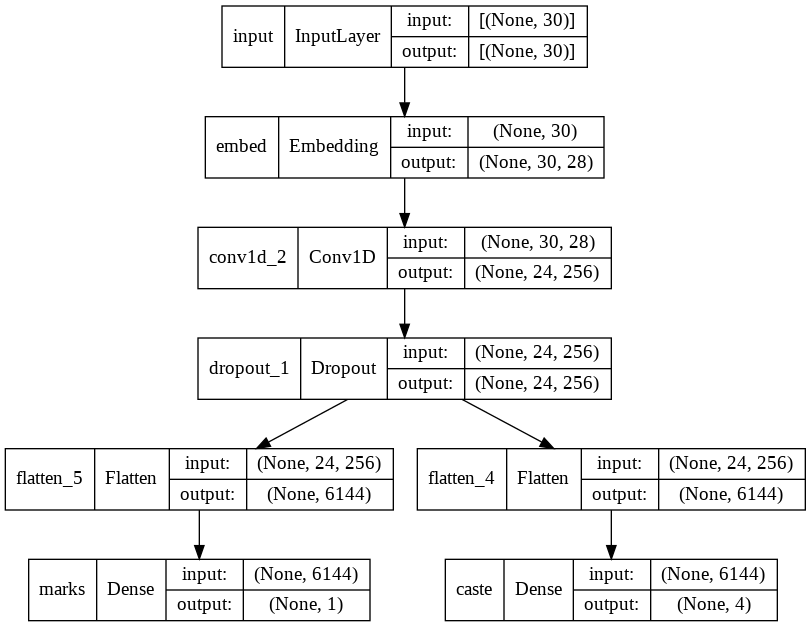

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
results = model.predict(test_cmx)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = np.argmax(results[1], axis=1)
y_true = np.argmax(test_cmy1, axis=1)

target_names = ['GEN','OBC','SC','ST']

print("------------------RESULTS-------------------------------")
print(classification_report(y_true, y_pred))
print("--------------------------------------------------------")

------------------RESULTS-------------------------------
              precision    recall  f1-score   support

           0       0.71      0.81      0.76     37550
           1       0.56      0.57      0.56     21347
           2       0.46      0.14      0.21      6102
           3       0.79      0.43      0.56      2115

    accuracy                           0.66     67114
   macro avg       0.63      0.49      0.52     67114
weighted avg       0.64      0.66      0.64     67114

--------------------------------------------------------


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred = results[0]
y_true = test_cmy


print("------------------RESULTS-------------------------------")
print(mean_squared_error(y_true, y_pred))
print("--------------------------------------------------------")

------------------RESULTS-------------------------------
1.2119505736226865
--------------------------------------------------------


Single Task and without marks

In [ ]:
input_ = Input(shape=(30,), name='input')

embed = Embedding(len(voc), len(voc), name='embed')(input_)

conv_1 = Conv1D(filters = 256, kernel_size = 7, activation = 'relu')(embed)

conv_2 = Conv1D(filters = 128, kernel_size = 3, activation = 'relu')(conv_1)

flat_2 = Flatten()(conv_2)
caste = Dense(4, activation='softmax', name='caste')(flat_2)

model1 = Model(inputs= input_, outputs=[caste])

model1.compile(
    loss={
        # 'gender': 'sparse_categorical_crossentropy',
        'caste': 'categorical_crossentropy',
    },
    optimizer='adam',
    metrics={
        'caste':'categorical_accuracy',
    }
)

model1.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 30)]              0         
_________________________________________________________________
embed (Embedding)            (None, 30, 28)            784       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 24, 256)           50432     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 22, 128)           98432     
_________________________________________________________________
flatten_9 (Flatten)          (None, 2816)              0         
_________________________________________________________________
caste (Dense)                (None, 4)                 11268     
Total params: 160,916
Trainable params: 160,916
Non-trainable params: 0
_____________________________________________________

In [ ]:
model1.fit(
    {'input':train_cmx},
    { 'caste':train_cmy1},
    validation_data= ({'input':val_cmx},
    {'caste':val_cmy1}),
    batch_size=100,
    epochs=10,
)

Epoch 1/10
2348/2348 [==============================] - 25s 10ms/step - loss: 0.8729 - categorical_accuracy: 0.6270 - val_loss: 0.8082 - val_categorical_accuracy: 0.6529
Epoch 2/10
2348/2348 [==============================] - 22s 9ms/step - loss: 0.7863 - categorical_accuracy: 0.6616 - val_loss: 0.7833 - val_categorical_accuracy: 0.6595
Epoch 3/10
2348/2348 [==============================] - 22s 9ms/step - loss: 0.7523 - categorical_accuracy: 0.6758 - val_loss: 0.7756 - val_categorical_accuracy: 0.6654
Epoch 4/10
2348/2348 [==============================] - 22s 9ms/step - loss: 0.7277 - categorical_accuracy: 0.6877 - val_loss: 0.7802 - val_categorical_accuracy: 0.6682
Epoch 5/10
2348/2348 [==============================] - 22s 9ms/step - loss: 0.7045 - categorical_accuracy: 0.6988 - val_loss: 0.7724 - val_categorical_accuracy: 0.6678
Epoch 6/10
2348/2348 [==============================] - 22s 9ms/step - loss: 0.6826 - categorical_accuracy: 0.7089 - val_loss: 0.7813 - val_categorical_ac

In [ ]:
results = model1.predict(test_cmx)
y_pred = np.argmax(results, axis=1)
y_true = np.argmax(test_cmy1, axis=1)

target_names = ['GEN','OBC','SC','ST']

print("------------------RESULTS-------------------------------")
print(classification_report(y_true, y_pred))
print("--------------------------------------------------------")

------------------RESULTS-------------------------------
              precision    recall  f1-score   support

           0       0.71      0.82      0.76     37550
           1       0.58      0.54      0.56     21347
           2       0.41      0.19      0.26      6102
           3       0.78      0.49      0.60      2115

    accuracy                           0.66     67114
   macro avg       0.62      0.51      0.55     67114
weighted avg       0.64      0.66      0.65     67114

--------------------------------------------------------


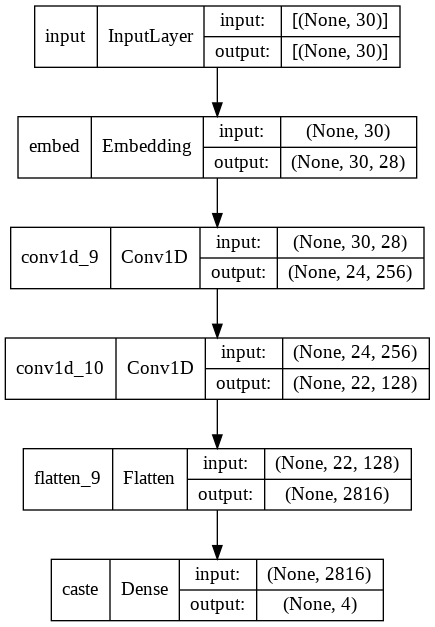

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True)

MODEL 3

In [ ]:
from sklearn.utils import class_weight

def get_sample_weights(labels):
  l = np.argmax(labels, axis = 1)
  # cur = l.shape
  # l = l.reshape(cur[0])
  weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(l),y=l)
  return weights

In [142]:
weights = get_sample_weights(train_cmy1)

In [156]:
weights1 = class_weight.compute_sample_weight('balanced',train_cmy1)

In [154]:
weights

array([0.44766701, 0.78314696, 2.77210571, 7.77842942])

In [168]:
input_ = Input(shape=(30,), name='input')
embed = Embedding(len(voc), len(voc), name='embed')(input_)
conv_1 = Conv1D(filters = 256, kernel_size = 7, activation = 'relu')(embed)
conv_2 = Conv1D(filters = 128, kernel_size = 3, activation = 'relu')(conv_1)
flat_2 = Flatten()(conv_2)
caste = Dense(4, activation='softmax', name='caste')(flat_2)
model4 = Model(inputs= input_, outputs=[caste])


# def custom_loss_4(y_true, y_pred, weights):
#   scce = tf.keras.losses.SparseCategoricalCrossentropy()
#   return scce(y_true, y_pred, sample_weight=tf.constant([0.3, 0.7])).numpy()

# def custom_loss(y_true, y_pred):
#   weights = [0.44766701, 0.78314696, 2.77210571, 7.77842942]
#   scce = tf.keras.losses.CategoricalCrossentropy()
#   return scce(y_true, y_pred, weights).numpy()


model4.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics={
      'caste':'categorical_accuracy',
  },
  loss_weights=class_weight.compute_sample_weight('balanced',train_cmy1)
)
print(model4.summary())

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 30)]              0         
_________________________________________________________________
embed (Embedding)            (None, 30, 28)            784       
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 24, 256)           50432     
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 22, 128)           98432     
_________________________________________________________________
flatten_33 (Flatten)         (None, 2816)              0         
_________________________________________________________________
caste (Dense)                (None, 4)                 11268     
Total params: 160,916
Trainable params: 160,916
Non-trainable params: 0
____________________________________________________

In [169]:
model4.fit(
    {'input':train_cmx},
    { 'caste':train_cmy1},
    validation_data= ({'input':val_cmx},
    {'caste':val_cmy1}),
    batch_size=100,
    epochs=10,
)

Epoch 1/10
2348/2348 [==============================] - 37s 10ms/step - loss: 0.6182 - categorical_accuracy: 0.6274 - val_loss: 0.5772 - val_categorical_accuracy: 0.6485
Epoch 2/10
2348/2348 [==============================] - 23s 10ms/step - loss: 0.5587 - categorical_accuracy: 0.6605 - val_loss: 0.5560 - val_categorical_accuracy: 0.6592
Epoch 3/10
2348/2348 [==============================] - 23s 10ms/step - loss: 0.5348 - categorical_accuracy: 0.6758 - val_loss: 0.5545 - val_categorical_accuracy: 0.6626
Epoch 4/10
2348/2348 [==============================] - 23s 10ms/step - loss: 0.5170 - categorical_accuracy: 0.6868 - val_loss: 0.5514 - val_categorical_accuracy: 0.6659
Epoch 5/10
2348/2348 [==============================] - 22s 10ms/step - loss: 0.5012 - categorical_accuracy: 0.6966 - val_loss: 0.5494 - val_categorical_accuracy: 0.6627
Epoch 6/10
2348/2348 [==============================] - 22s 10ms/step - loss: 0.4858 - categorical_accuracy: 0.7065 - val_loss: 0.5568 - val_categoric

In [167]:
results = model4.predict(test_cmx)
y_pred = np.argmax(results, axis=1)
y_true = np.argmax(test_cmy1, axis=1)

target_names = ['GEN','OBC','SC','ST']

print("------------------RESULTS-------------------------------")
print(classification_report(y_true, y_pred))
print("--------------------------------------------------------")

------------------RESULTS-------------------------------
              precision    recall  f1-score   support

           0       0.72      0.80      0.76     37550
           1       0.57      0.56      0.56     21347
           2       0.43      0.17      0.25      6102
           3       0.67      0.51      0.58      2115

    accuracy                           0.66     67114
   macro avg       0.60      0.51      0.54     67114
weighted avg       0.64      0.66      0.64     67114

--------------------------------------------------------


In [170]:
weights1 = class_weight.compute_sample_weight('balanced',train_cmy1)


In [172]:
len(weights1)

234753

In [177]:
train_cmy1[20:40]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [178]:
weights1[20:40]

array([0.1866919 , 0.1866919 , 0.1866919 , 0.5035449 , 0.1866919 ,
       0.1866919 , 0.1866919 , 0.1866919 , 0.1866919 , 0.1866919 ,
       0.1866919 , 0.1866919 , 2.38207018, 0.1866919 , 2.38207018,
       0.1866919 , 0.1866919 , 2.38207018, 0.1866919 , 7.11042649])

TWO CLASS CLASSIFICATION

In [179]:
train_cmy1.shape

(234753, 4)

In [186]:
train_cmy1_two_class = []
test_cmy1_two_class = []
val_cmy1_two_class = []

In [191]:
val_cmy1_two_class = []

In [187]:
for elem in train_cmy1:
  if (elem == [1,0,0,0]).all():
    train_cmy1_two_class.append([1,0])
  else:
    train_cmy1_two_class.append([0,1])

In [188]:
for elem in test_cmy1:
  if (elem == [1,0,0,0]).all():
    test_cmy1_two_class.append([1,0])
  else:
    test_cmy1_two_class.append([0,1])

In [192]:
for elem in val_cmy1:
  if (elem == [1,0,0,0]).all():
    val_cmy1_two_class.append([1,0])
  else:
    val_cmy1_two_class.append([0,1])

In [196]:
train_cmy1_two_class = np.array(train_cmy1_two_class)
test_cmy1_two_class = np.array(test_cmy1_two_class)
val_cmy1_two_class = np.array(val_cmy1_two_class)

In [210]:
input_ = Input(shape=(30,), name='input')
embed = Embedding(len(voc), len(voc), name='embed')(input_)
conv_1 = Conv1D(filters = 256, kernel_size = 7, activation = 'relu')(embed)
flat_2 = Flatten()(conv_1)
caste = Dense(2, activation='softmax', name='caste')(flat_2)
model5 = Model(inputs= input_, outputs=caste)

model5.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics={
      'caste':'binary_accuracy',
  },
  loss_weights=class_weight.compute_sample_weight('balanced',train_cmy1_two_class)
)
print(model5.summary())

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 30)]              0         
_________________________________________________________________
embed (Embedding)            (None, 30, 28)            784       
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 24, 256)           50432     
_________________________________________________________________
flatten_40 (Flatten)         (None, 6144)              0         
_________________________________________________________________
caste (Dense)                (None, 2)                 12290     
Total params: 63,506
Trainable params: 63,506
Non-trainable params: 0
_________________________________________________________________
None


In [211]:
model5.fit(
    {'input':train_cmx},
    { 'caste':train_cmy1_two_class},
    validation_data= ({'input':val_cmx},
    {'caste':val_cmy1_two_class}),
    batch_size=100,
    epochs=10,
)

Epoch 1/10
2348/2348 [==============================] - 19s 8ms/step - loss: 0.6045 - binary_accuracy: 0.6653 - val_loss: 0.5734 - val_binary_accuracy: 0.6906
Epoch 2/10
2348/2348 [==============================] - 18s 8ms/step - loss: 0.5593 - binary_accuracy: 0.7023 - val_loss: 0.5584 - val_binary_accuracy: 0.6978
Epoch 3/10
2348/2348 [==============================] - 19s 8ms/step - loss: 0.5399 - binary_accuracy: 0.7176 - val_loss: 0.5541 - val_binary_accuracy: 0.7051
Epoch 4/10
2348/2348 [==============================] - 19s 8ms/step - loss: 0.5267 - binary_accuracy: 0.7273 - val_loss: 0.5457 - val_binary_accuracy: 0.7112
Epoch 5/10
2348/2348 [==============================] - 18s 8ms/step - loss: 0.5158 - binary_accuracy: 0.7364 - val_loss: 0.5416 - val_binary_accuracy: 0.7148
Epoch 6/10
2348/2348 [==============================] - 18s 8ms/step - loss: 0.5066 - binary_accuracy: 0.7434 - val_loss: 0.5597 - val_binary_accuracy: 0.7051
Epoch 7/10
2348/2348 [========================

In [212]:
results = model5.predict(test_cmx)
y_pred = np.argmax(results, axis=1)
y_true = np.argmax(test_cmy1_two_class, axis=1)

target_names = ['GEN','RESERVED']

print("------------------RESULTS-------------------------------")
print(classification_report(y_true, y_pred, target_names=target_names))
print("--------------------------------------------------------")

------------------RESULTS-------------------------------
              precision    recall  f1-score   support

         GEN       0.75      0.73      0.74     37550
    RESERVED       0.67      0.69      0.68     29564

    accuracy                           0.72     67114
   macro avg       0.71      0.71      0.71     67114
weighted avg       0.72      0.72      0.72     67114

--------------------------------------------------------


TRYING WITH LSTM